### Import custom libraries

In [1]:
import image_processing
import deep_learning
import aux

### Install the required libraries

pip install -r requirements.txt

### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Preparation

#### Week consumptions with next_day_cluster

In [3]:
data = pd.read_csv ("../data/previos7_new.csv",sep=";",header=None)
data = data.iloc[:,1:] 
data.columns = [*data.columns[:-1], 'next_day_cluster']
data

,1,2,3,4,5,6,7,8,9,10,...,160,161,162,163,164,165,166,167,168,next_day_cluster
0,217,167,181,189,204,322,221,247,174,208,...,159,187,186,161,2658,1748,957,421,218,0
1,177,172,184,179,186,271,255,236,328,167,...,184,178,162,412,2938,848,926,1999,415,5
2,168,215,165,181,202,328,313,226,203,190,...,201,179,159,498,1015,757,620,1131,279,5
3,163,208,200,157,202,318,286,563,197,176,...,152,199,195,152,195,335,1105,685,205,5
4,214,202,164,202,151,316,256,145,190,215,...,163,200,197,160,207,200,181,174,193,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,174,169,175,172,152,188,409,336,251,147,...,150,143,119,149,135,131,121,144,149,5
525,192,171,191,194,166,308,1570,1397,196,164,...,145,125,143,151,124,121,172,121,121,5
526,173,149,172,177,148,284,419,1678,711,171,...,147,153,122,153,122,155,148,133,142,5
527,177,172,194,150,171,153,168,424,551,2944,...,127,173,123,157,127,157,146,154,129,5


### Week consumptions without next_day_cluster column

It will be necessary to generate the 2D images for each week consumption time series.

In [4]:
data_with_no_next_day_row = data.iloc[: , :-1]

In [5]:
data_with_no_next_day_row

,1,2,3,4,5,6,7,8,9,10,...,159,160,161,162,163,164,165,166,167,168
0,217,167,181,189,204,322,221,247,174,208,...,179,159,187,186,161,2658,1748,957,421,218
1,177,172,184,179,186,271,255,236,328,167,...,174,184,178,162,412,2938,848,926,1999,415
2,168,215,165,181,202,328,313,226,203,190,...,152,201,179,159,498,1015,757,620,1131,279
3,163,208,200,157,202,318,286,563,197,176,...,190,152,199,195,152,195,335,1105,685,205
4,214,202,164,202,151,316,256,145,190,215,...,155,163,200,197,160,207,200,181,174,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,174,169,175,172,152,188,409,336,251,147,...,120,150,143,119,149,135,131,121,144,149
525,192,171,191,194,166,308,1570,1397,196,164,...,147,145,125,143,151,124,121,172,121,121
526,173,149,172,177,148,284,419,1678,711,171,...,124,147,153,122,153,122,155,148,133,142
527,177,172,194,150,171,153,168,424,551,2944,...,158,127,173,123,157,127,157,146,154,129


### Example of hourly consumptions time series for a week of a random consumer

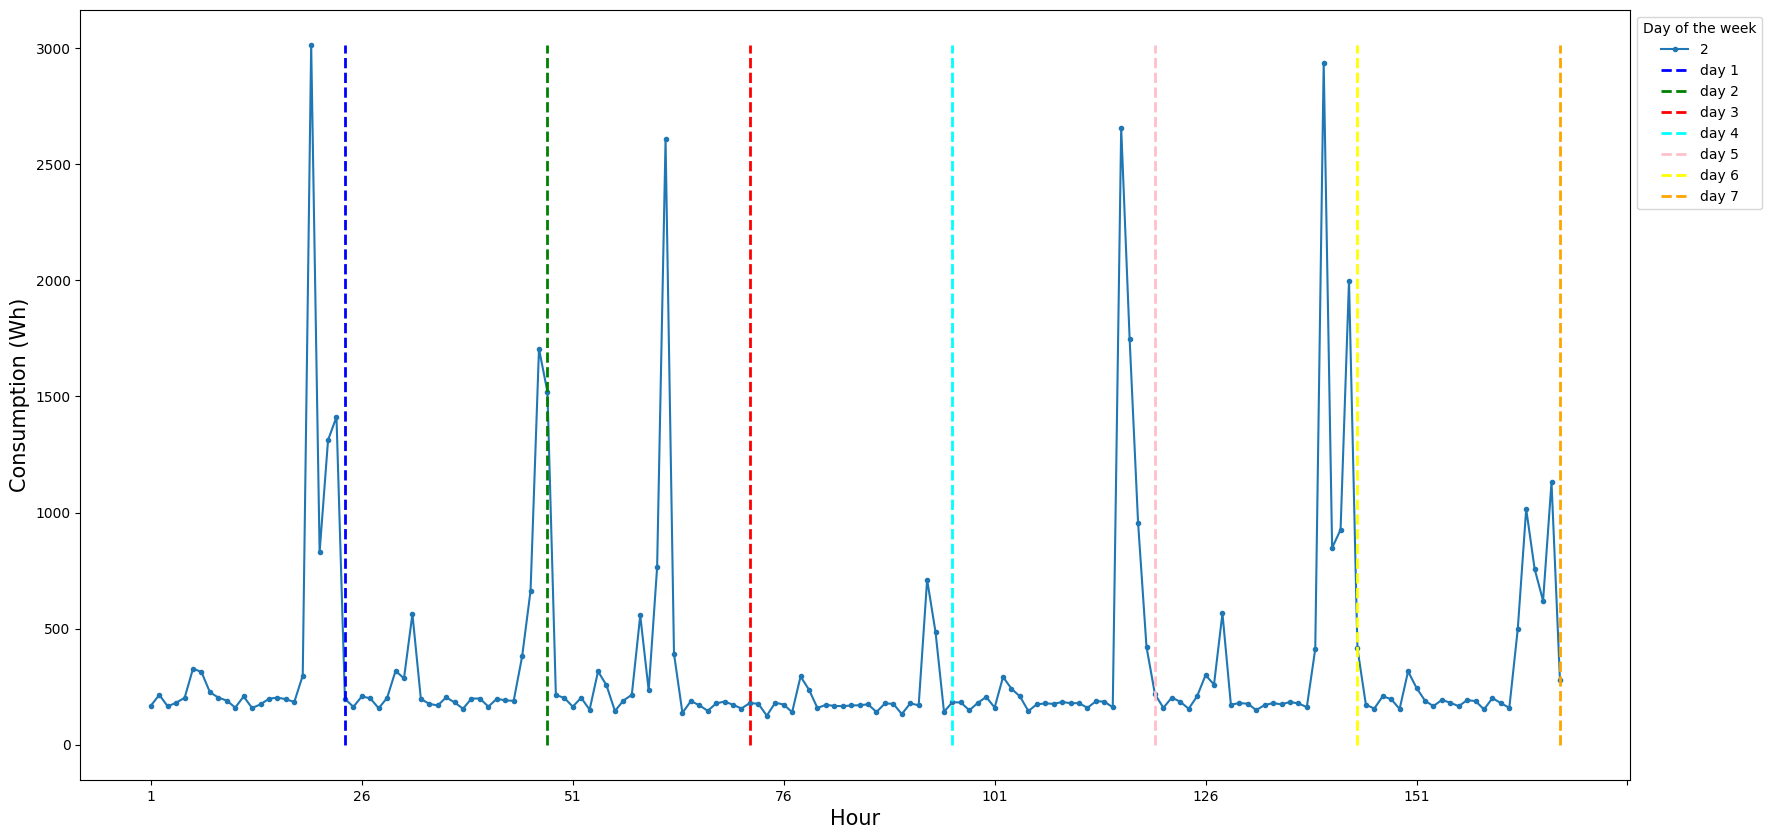

In [6]:
rowTS = (data_with_no_next_day_row.iloc[2])
aux.plot_time_series_with_week_separator(rowTS)

### Centroids for next day curves

Load 21 centroid model from Ireland

In [7]:
centroids = [ [ 666.40479893,  484.33481247,  403.49585082,  370.5242449 ,
         363.99568771,  391.12255842,  496.10640185,  659.05330929,
         732.29261459,  661.01002998,  626.41878595,  557.36233516,
         555.74481743,  628.43159322,  623.64899298,  647.05002927,
         688.73262013,  989.96810246, 1397.61470245, 1526.12345439,
        1467.50739569, 1424.30494595, 1277.73625541, 1007.61093758],
 [7988.88639466, 7268.74730775, 6804.77445776, 6640.17503413,
        6434.40785682, 6337.86303655, 6328.51327165, 6650.20203246,
        7212.94342484, 7726.6173214 , 8306.49582891, 8685.71105718,
        9029.67844684, 8995.13635674, 9000.76566055, 8950.58956469,
        9127.54664038, 9296.29713332, 9482.04307599, 9707.37919005,
        9684.54300015, 9512.9323525 , 8907.89276505, 8432.03579554],
 [5063.53569443, 4365.20704993, 3896.86967641, 3597.82525297,
        3459.25408651, 3456.88007339, 3567.78494385, 3849.55665518,
        4187.1664628 , 4334.57300122, 4484.80946292, 4604.65072834,
        4891.90164572, 4842.72334038, 4875.54475703, 5077.23446014,
        5581.56388302, 6209.94340042, 6724.0742244 , 7015.64422328,
        7026.27376849, 6932.77082175, 6616.3797954 , 5979.58968086],
 [ 664.64971722,  484.24338371,  403.54985479,  369.60886776,
         362.38005281,  393.0481233 ,  495.5519526 ,  690.89894635,
         841.49293436,  824.32571513,  840.90577216,  814.3801635 ,
         856.04135019,  902.06588095,  901.49747788, 1392.20289267,
        2653.60199451, 2977.45762989, 1610.71474955, 1378.71938267,
        1351.9737931 , 1336.13024388, 1202.78810991,  964.67879676],
 [8317.06892543, 8494.768477  , 8141.3019432 , 7593.31971433,
        6861.97176549, 6048.78790899, 5365.8445441 , 4482.35459226,
        2397.45523999, 2033.88739412, 2330.18285999, 2274.50357084,
        2217.54658695, 2044.82710513, 2013.83341638, 1976.31772131,
        1890.80468361, 1553.51934895, 1301.88290982, 1304.58379007,
        1332.65819631, 1404.31954825, 1763.12771965, 5746.45308088],
 [320.96178046, 255.8529408 , 229.07278026, 219.64003234,
        219.84097373, 230.34301883, 278.94034518, 365.18098082,
        400.59031706, 395.79920081, 372.54551802, 340.40825456,
        343.47485796, 352.78843204, 339.48136236, 350.84684382,
        383.45530162, 445.23904749, 459.05602476, 460.7941184 ,
        481.0623598 , 508.57178647, 488.21405724, 411.43217114],
 [ 744.03409614,  531.72816415,  450.16188436,  419.39059399,
         413.72691544,  434.3549074 ,  511.50830058,  770.96687654,
        2036.33027511, 4275.53008057, 2376.44072609, 1269.39402463,
        1136.45864168, 1099.6225371 , 1008.03069178, 1040.88979876,
        1179.39464241, 1439.46789521, 1541.92177868, 1564.42676691,
        1509.7273492 , 1470.47353409, 1314.84056047, 1037.55479173],
 [1601.16603784, 1170.65591189,  959.14439882,  878.8354325 ,
         843.33421184,  861.24551961, 1003.8459191 , 1423.54288964,
        2003.28488598, 2671.09454586, 3392.50585363, 3846.09160517,
        4295.97386673, 4593.98673917, 4619.61335516, 4631.94401598,
        4846.79961716, 5423.64528658, 5400.69708151, 4917.79620485,
        4308.65682739, 3766.67399989, 3124.9490096 , 2392.10758475],
 [3143.24018488, 2796.65769111, 2539.80058164, 2408.06945887,
        2377.95899979, 2403.00059722, 2524.84233486, 2824.19295285,
        2941.967984  , 2819.09906003, 2755.33350644, 2713.53733901,
        2693.8324678 , 2662.73995118, 2571.32922206, 2558.56930307,
        2656.32319796, 2854.96917844, 2976.30460636, 2999.86770357,
        3070.49085999, 3190.84841088, 3166.72546219, 3052.21214167],
 [ 924.00874251,  661.89334664,  548.39566201,  500.16010645,
         487.6160346 ,  507.34621424,  590.92546906,  818.70312708,
        1197.05776447, 1920.45172322, 4071.36357951, 4294.43602129,
        2469.61630073, 1647.86794411, 1424.84790419, 1408.84958084,
        1557.61201597, 1876.66726547, 1996.53409182, 2021.52737192,
        1928.34179641, 1826.09276114, 1607.99800399, 1261.05015303],
 [ 812.21019229,  574.68051668,  472.65269536,  433.00153241,
         427.64155564,  469.31139442,  633.07503918,  959.77076803,
        1098.21715461,  991.33350593,  982.19459528,  955.48468988,
         992.90856611, 1049.9502701 ,  969.16469576, 1005.36742891,
        1312.31778997, 2916.27394481, 4615.82014107, 3177.27366491,
        2249.42958604, 1897.53034035, 1592.4525932 , 1210.68650638],
 [ 642.57734751,  483.99367229,  403.49586352,  370.68959448,
         359.51990161,  370.07461016,  416.89810214,  523.60774039,
         728.8428407 ,  929.33392458, 1341.47870377, 1737.51633606,
        2046.35477174, 1563.61767427, 1046.05980638,  909.43473924,
         878.26403538,  957.53414122,  980.66428813,  948.69999323,
         956.18663598,  993.69464491,  951.83177397,  803.69112901],
 [ 878.4607494 ,  650.14644639,  533.69427373,  472.9124521 ,
         452.51305039,  463.77182597,  528.63582713,  700.44790688,
         930.56599306, 1070.47802943, 1222.95578772, 1297.33524329,
        1498.10612031, 2541.81275757, 3764.96807895, 3080.80275287,
        1989.60919312, 1668.09438038, 1638.56510737, 1642.48099378,
        1590.33541501, 1571.93889632, 1436.67476141, 1183.35150206],
 [1214.39438737, 1128.04979955, 1082.22638436, 1067.5663994 ,
        1058.08312453, 1050.55712854, 1090.87214984, 1445.62189927,
        3157.46172638, 7300.26265347, 8970.56746429, 9258.00745427,
        9114.90967176, 8316.58926334, 8724.38893761, 8678.63148334,
        8195.13248559, 6048.81589827, 2487.61644951, 1572.3070659 ,
        1318.12722375, 1259.56840391, 1214.6663117 , 1195.21485843],
 [3727.43318769, 3534.45903878, 3398.14127071, 3392.89249954,
        3368.24003277, 3374.38494447, 3544.37156381, 4360.42799927,
        6742.08747497, 9087.88376115, 9860.98124886, 9872.27571455,
        9851.59894411, 9491.13890406, 9352.42508647, 9260.12980157,
        9077.31139632, 7964.41307118, 6086.85882032, 5149.9208083 ,
        4354.26697615, 3901.54951757, 3563.21017659, 3571.9576734 ],
 [ 913.61542846,  781.63053205,  724.87335784,  706.45008692,
         704.80832692,  716.9262489 ,  825.49348836, 1145.99270468,
        2275.2919837 , 4475.50676812, 5440.60058135, 5554.70519506,
        5347.03126158, 4596.07266821, 4666.11293494, 4441.23652788,
        4042.72155253, 2942.87446924, 1637.88943034, 1323.41953777,
        1210.021373  , 1164.52400901, 1074.35912342,  965.97936793],
 [1104.78540487,  744.46498413,  585.5849443 ,  523.93598681,
         506.04348665,  541.99653327,  676.98950022,  969.2010145 ,
        1072.42832514,  945.66657746,  950.52198917,  937.85971868,
         967.88452107, 1014.9711396 ,  960.02245597, 1022.0998444 ,
        1160.32115516, 1427.85995519, 1800.21212423, 2745.17020601,
        3488.90814713, 3503.88833634, 2835.28454596, 1999.12927118],
 [1046.19702105,  743.46590955,  592.95869175,  524.10774715,
         499.38476497,  514.20733799,  593.71533901,  795.06843747,
        1088.80015664, 1319.82150622, 1615.09671452, 2615.47429544,
        4912.85032342, 3966.45790177, 2197.99292399, 1708.58566162,
        1698.25493903, 2016.31886622, 2229.6629306 , 2262.28522815,
        2153.13864394, 2075.5511458 , 1831.67612386, 1454.3954195 ],
 [1076.95739708,  767.7100562 ,  624.48005518,  558.85659564,
         539.21520344,  573.39004982,  735.66330358, 1175.04610281,
        1454.24856071, 1441.21697048, 1483.09184081, 1487.34782311,
        1584.88762726, 1790.97665219, 2100.87661457, 3135.88287333,
        4713.39260349, 4781.55077123, 3304.97372231, 2832.91886407,
        2614.59946191, 2434.11538242, 2092.13811462, 1608.12465087],
 [ 899.11416455,  684.02896997,  603.9178668 ,  582.95995188,
         597.02198954,  686.6068089 , 1234.00469333, 3534.1331761 ,
        2925.28366032, 1326.86539447, 1014.67541007,  952.45652718,
        1004.1651598 , 1033.69487427,  984.78516718, 1098.29171283,
        1332.94560983, 1725.28576874, 1808.8681104 , 1860.87802118,
        1773.77294548, 1722.19795352, 1549.18947218, 1225.38493609],
 [1433.63696948,  960.17417448,  757.08174241,  685.69120275,
         667.90362613,  713.51926642,  934.18354462, 1577.26653973,
        1825.25386247, 1631.31427569, 1592.29403217, 1551.69000017,
        1578.45990546, 1631.1542483 , 1610.63678576, 1772.0194418 ,
        2343.52502881, 3659.63499858, 4914.64129545, 5772.12142774,
        5439.95091113, 4704.81967898, 3740.83264018, 2635.09949725] ]

Convert list with centroids to time series data frame

In [8]:
dfCentroids = pd.DataFrame(centroids, columns = [*range(0, 24, 1)] ) 
dfCentroids = dfCentroids.round(0)
dfCentroids = dfCentroids.astype(int)
dfCentroids

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,666,484,403,371,364,391,496,659,732,661,...,624,647,689,990,1398,1526,1468,1424,1278,1008
1,7989,7269,6805,6640,6434,6338,6329,6650,7213,7727,...,9001,8951,9128,9296,9482,9707,9685,9513,8908,8432
2,5064,4365,3897,3598,3459,3457,3568,3850,4187,4335,...,4876,5077,5582,6210,6724,7016,7026,6933,6616,5980
3,665,484,404,370,362,393,496,691,841,824,...,901,1392,2654,2977,1611,1379,1352,1336,1203,965
4,8317,8495,8141,7593,6862,6049,5366,4482,2397,2034,...,2014,1976,1891,1554,1302,1305,1333,1404,1763,5746
5,321,256,229,220,220,230,279,365,401,396,...,339,351,383,445,459,461,481,509,488,411
6,744,532,450,419,414,434,512,771,2036,4276,...,1008,1041,1179,1439,1542,1564,1510,1470,1315,1038
7,1601,1171,959,879,843,861,1004,1424,2003,2671,...,4620,4632,4847,5424,5401,4918,4309,3767,3125,2392
8,3143,2797,2540,2408,2378,2403,2525,2824,2942,2819,...,2571,2559,2656,2855,2976,3000,3070,3191,3167,3052
9,924,662,548,500,488,507,591,819,1197,1920,...,1425,1409,1558,1877,1997,2022,1928,1826,1608,1261


**Plot centroids**

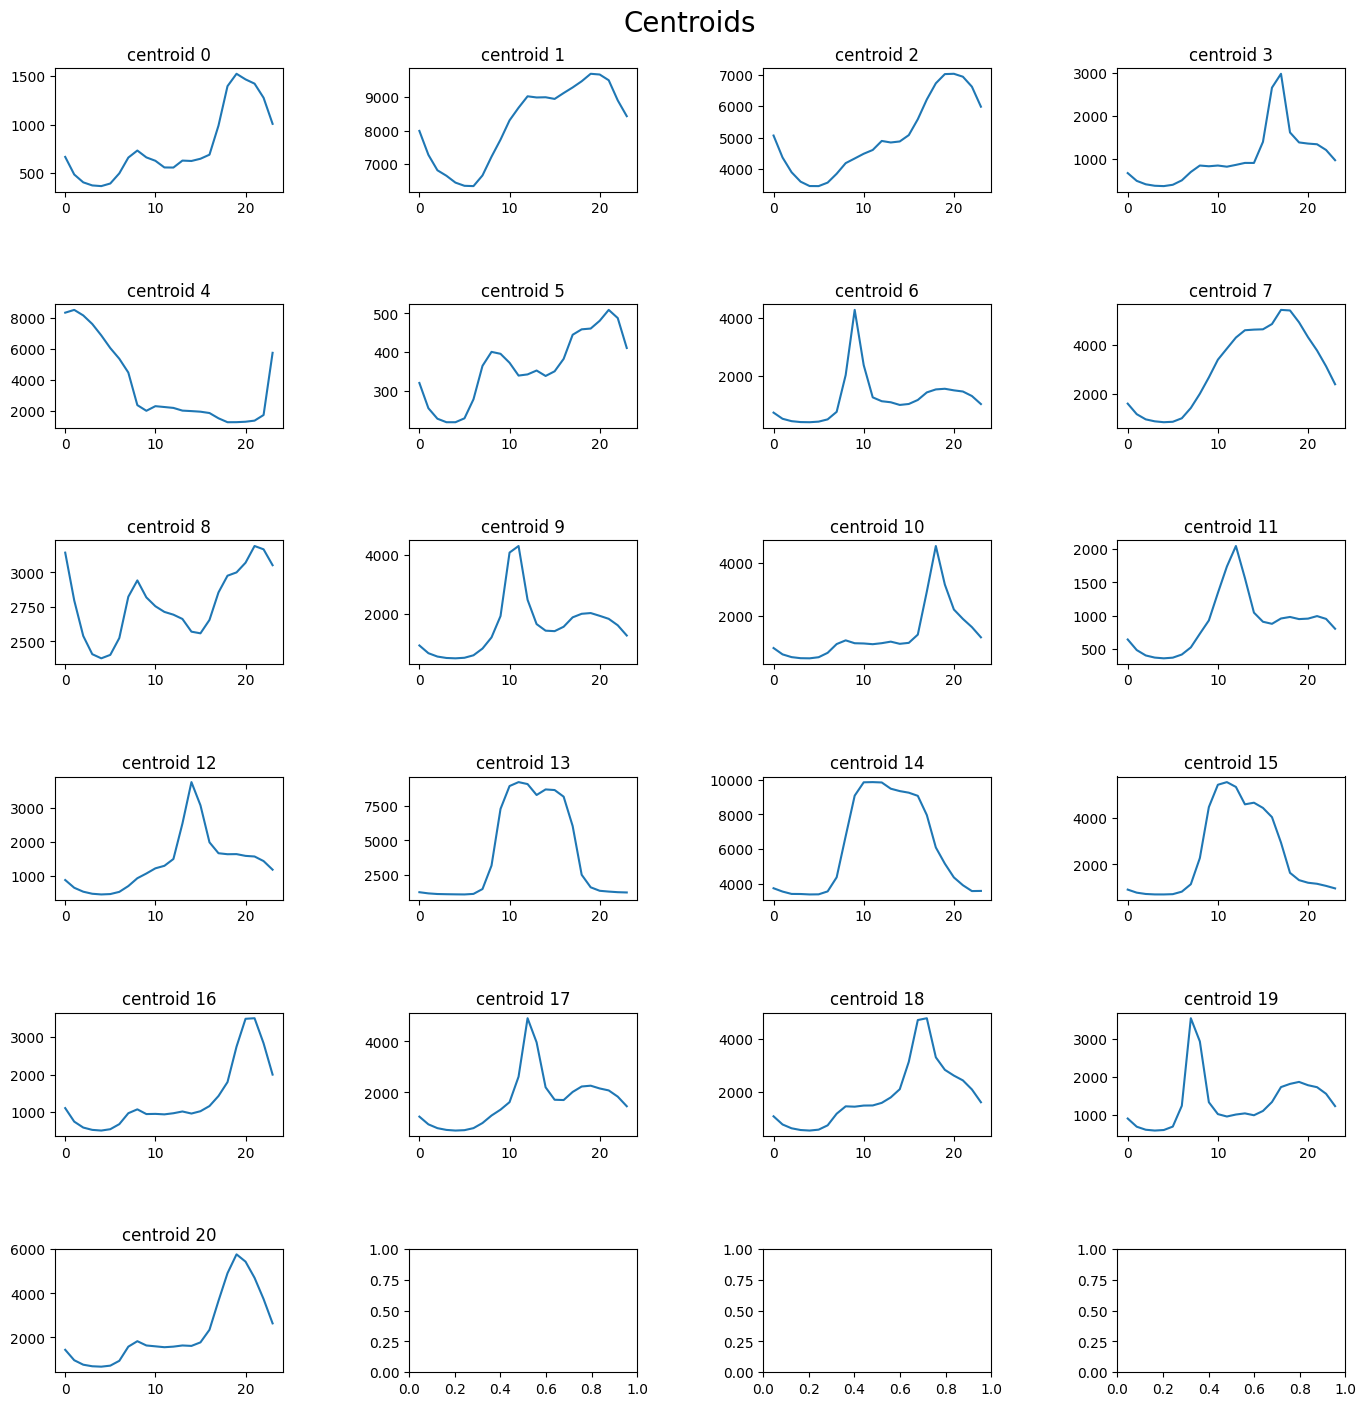

In [9]:
M =6
N= 4
fig, axs = plt.subplots(M, N,figsize=(15,15))
fig.tight_layout(pad=6.0)
fig.suptitle('Centroids', fontsize=20)
centroids_id = 0
for i in range(M):
    for j in range(N):
            if centroids_id<len(centroids):
                axs[i,j].plot(dfCentroids.iloc[centroids_id])
                axs[i, j].set_title("centroid " + str(centroids_id))
                centroids_id+=1

## Imaging Time Series

### Modelling Neural Network Input Week Time series as 2D images

Each weekly consumption time series is converted to a 2D image format that can be manipulated by the deep learning algorithms.

**Example of first week consumption of time series dataframe**

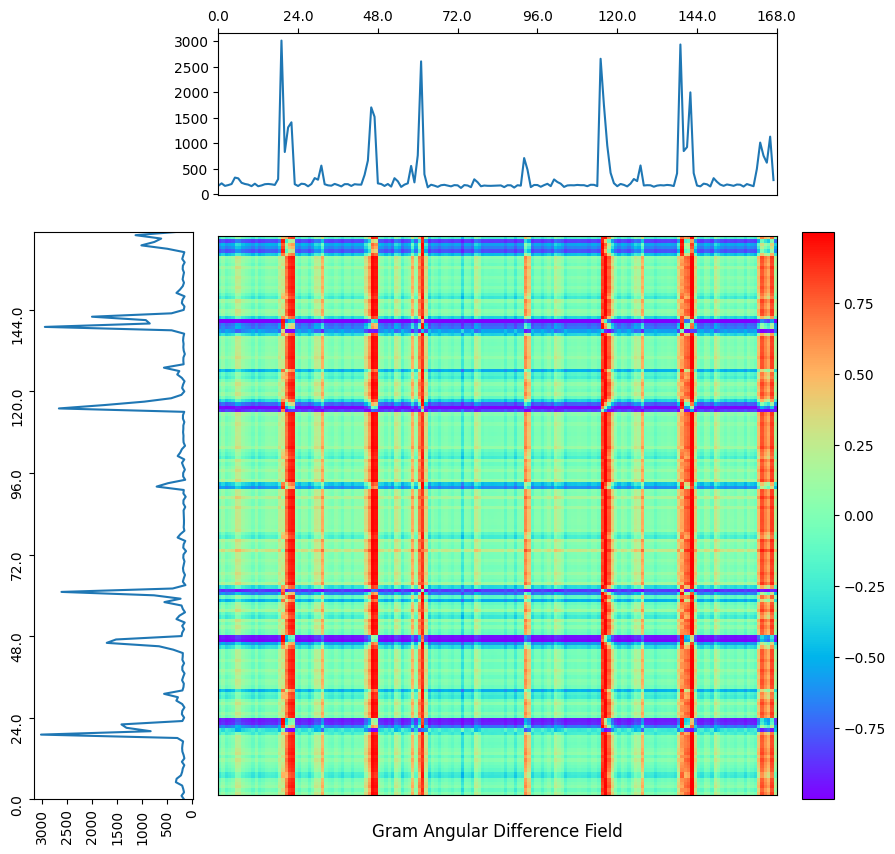

In [10]:
ts_week = data_with_no_next_day_row.iloc[2]
gaf_ts_diff = image_processing.transform_image_with_gram_angular_field(ts_week, method='difference')
image_processing.plot_gram_angular_field(ts_week,gaf_ts_diff)

### Example for polar coordinates time series plot

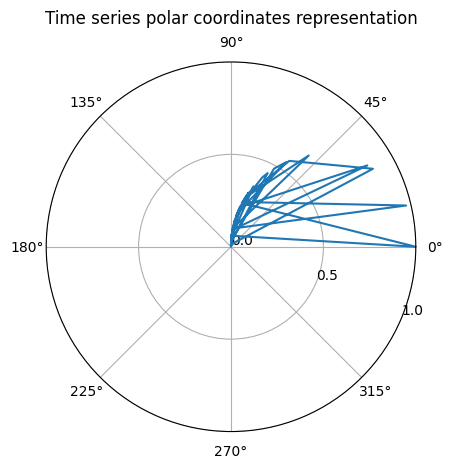

In [11]:
# get time series normalized between 0 and 1
normalize_ts_ = image_processing.normalize_ts(data_with_no_next_day_row.iloc[2])
# get polar coords from normalized ts
(phi,r) = image_processing.polar_rep(normalize_ts_)
#plot image in polar coordinate system
image_processing.plot_polar_coords(phi,r)

### Example of cluster in Gram Domain

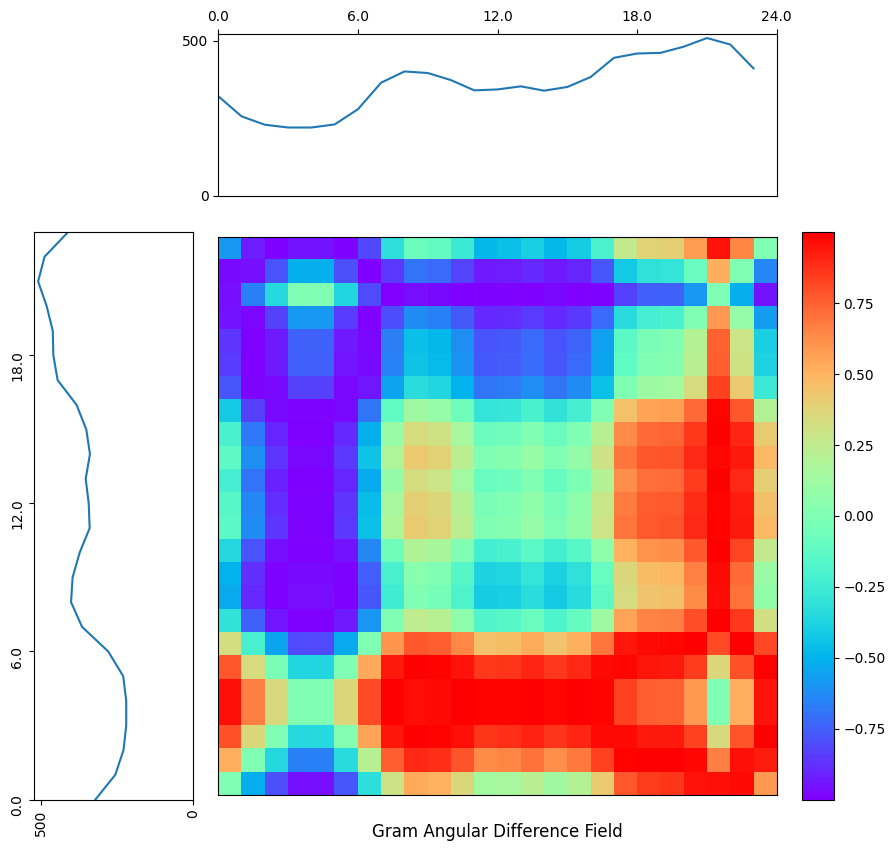

In [12]:
ts_cluster = dfCentroids.iloc[5]
gaf_ts_diff = image_processing.transform_image_with_gram_angular_field(ts_cluster, method='difference')
image_processing.plot_gram_angular_field (ts_cluster,gaf_ts_diff,type_ts='cluster')

### Generate input neural network images (week consumptions on Gram domain)

In [13]:
# Calculate Gram Angular Difference Field
input_nn = data_with_no_next_day_row.apply( 
    image_processing.transform_image_with_gram_angular_field,
    axis=1)


### Generate output neural network (next day consumption cluster on Gram Domain)

**Esto solo lo usaremos si nos da por probar a entrenar modelos con la transformada de Gramm de los clusteres de consumo del día siguiente como etiqueta (salida de la red), suponiendo que fuera posible. Nuestra primera alternativa solo usará las entradas (consumos semanales) en el dominio de Gramm. La salida para entrenar los modelos y lo que los modelos serán capaces de predecir, serán las propias etiquetas del cluster de consumo del día siguiente.**

In [185]:
# Calculate Gramian Angular Difference Field
output_nn = dfCentroids.apply( 
    image_processing.transform_image_with_gram_angular_field,
    axis=1)

### Save input (week) and output (daily) Gram domain matrices as csv

In [125]:
import os  

os.makedirs('../data/images/input', exist_ok=True)  
input_nn.to_csv('../data/images/input/input_images.csv') 

os.makedirs('../data/images/output', exist_ok=True)  
output_nn.to_csv('../data/images/output/output_images.csv') 

### Save input (week consumption on Gram matrix format) as PNG images 

Create a folder structure to store the weekly images in Gram domain that belong to each class
|next_day_cluster_0| ... |next_day_cluster_n|

In [24]:
next_day_clusters = [*range(0,len(dfCentroids))]
aux.create_folder_structure(next_day_clusters)

Saves as RGB images the GRAM matrices of weekly consumptions in the corresponding folder according to the cluster class of the next day of consumption. 

In [25]:
labels = data["next_day_cluster"]
image_processing.save_rgb_images(input_nn,labels)

## Train Deep Larning model

Create an instance of deep learning object with basic params setting for machine learning process

In [9]:
dl = deep_learning.DeepLearning(
    img_width = 128,
    img_height = 128,
    epochs = 100,
    batch_size=32,
    img_channels = 3
)

Split dataset in training and test

In [ ]:
# Each week consumption RGB image in Gramm  domain
input_images_path = '../data/images/input'

# Split dataset into test and train
dl.split_train_and_test(dataset_url = input_images_path)

Plot training dataset

In [ ]:
image_processing.visualize_train_dataset(dl.train_ds,dl.class_names)

In [10]:
# Train deep learning model
dl.input_shape =  (128, 128, 3)
print(dl.input_shape)
model = dl.train_model()

(128, 128, 3)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


ValueError: Unrecognized data type: x=[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC7EC0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC5EE0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C44AD0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF1070>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC7F80>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC65A0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC4860>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C35FD0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C475F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C34470>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D13770>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C366C0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E01BE0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2A6C0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC5C10>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C47140>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D294C0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C446B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E00320>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E02960>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC4350>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2AFC0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF0560>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2A5D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C44530>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC6990>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2A6F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC7680>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D12F90>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E007A0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC4590>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C47530>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E00F80>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC4A10>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C36810>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E00DD0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC58B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C35280>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C453A0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC46B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E02330>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D11910>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC6090>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C46600>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E01640>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D13740>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E020F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E028D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D10EF0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C34800>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C37350>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC7320>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C358B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC7D40>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E01AC0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D28CE0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC5A60>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D28530>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C44770>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC61B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C379B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D28350>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D28980>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D28740>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC7E60>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF2F00>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC59D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C47CE0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC7C20>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C46000>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C44740>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C44FE0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC6480>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C44140>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C37FB0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C354F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC4740>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF2F30>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC7290>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C36B40>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D294F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2B680>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2AD80>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C47FE0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C363C0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2BF80>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC6BD0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC48F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E015B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C46060>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF13A0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C36180>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C35160>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC4620>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E012E0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C44DA0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2ADB0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2A930>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC5DC0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D11850>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2BB30>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF0440>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C35520>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC42C0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C36090>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D28BC0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E011C0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E010A0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC4D70>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C46360>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC5040>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D293A0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC4FB0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E027B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D28F50>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D29EE0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2BFE0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C358E0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D28E30>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C46960>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C353A0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E003B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC6C60>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D136B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E01F40>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2AFF0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2B7D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF2C00>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E01910>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C47740>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C47E90>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D10950>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC6FC0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC41A0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D28770>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C46300>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC6E10>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E01E20>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D29A60>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D289B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297BAEC00>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C46090>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E00200>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2BC20>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2BE60>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF00E0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2A360>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C45760>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C44680>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2B320>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF00B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC6D80>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E02450>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D28650>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E01130>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C36FF0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2BA10>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C46810>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2BD70>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC5430>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC51F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D28D10>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF0200>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2B590>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC4140>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC7050>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C342F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C35340>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C45850>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C355E0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E004D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C468A0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E01010>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC73B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C36990>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C46420>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C45910>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC4AA0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E01D90>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C35100>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC6900>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF2360>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E01A30>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2A4B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E01250>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C44C20>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C45700>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E02720>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2AB40>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C46A20>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E00D40>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2A810>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D12DE0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC54C0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E02060>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC74D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C45550>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C44590>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D281A0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C47290>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D28AD0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC7710>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D29BB0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E00290>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C46720>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E01880>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC4500>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E016D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C448F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C34080>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C44290>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC7B00>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E008C0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC5310>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2A150>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E01EB0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC53A0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D29DC0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C35130>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D280B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D29A90>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C47B90>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2A240>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C37D70>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC4E00>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC6510>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C47B60>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF31A0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2B8F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2B200>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC6870>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D292B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C34E90>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF0170>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D28F20>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC7A70>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2A480>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C471D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF17C0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF3380>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D28BF0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D11640>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF3080>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D29040>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC6120>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D29CD0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297B0B3E0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF1490>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E00B00>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2AA50>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C46B10>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C36780>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E022A0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C363F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C47B00>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF0F80>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC67E0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C34E30>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF0B30>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2B6B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC5940>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C46BD0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C461B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2B560>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC4230>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C35430>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C46870>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2B110>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E01D00>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC78C0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC5820>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C45EE0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E02840>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E009E0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D10CB0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E005F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E00830>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E00CB0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C365D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF01D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D28860>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C45CA0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C47770>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D29280>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C470B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C345C0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D29970>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E00680>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC75F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC4CE0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C34200>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C44830>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC6A20>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC6630>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC6B40>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C45130>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D293D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC77A0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC5160>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C35490>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2A390>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E019A0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E02570>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C34170>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC5CA0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC47D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C47C20>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC7DD0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C346B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC4E90>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC4980>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297CF0AD0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC6AB0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C45B80>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E02690>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E00EF0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E024E0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C45010>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC7950>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D29160>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2B230>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E00A70>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E02180>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC5700>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D29730>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C36ED0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C46D50>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D29700>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C35640>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C46120>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D28470>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC6CF0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C374D0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E017F0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D28140>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E01FD0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298E023C0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D29CA0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2A270>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C46270>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C34F80>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2B0E0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC55E0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2AA20>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D11610>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C34950>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC4B30>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2A000>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x2938584A0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC7B90>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297D2B7A0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC4BC0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x298DC70E0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=168x168 at 0x297C47320>] (of type <class 'list'>)